# Clustering Digital Wallet User with KPrototypes (Survey Based)

### Project Overview

The goal of this project is to cluster Digital Wallet users based on their survey responses using the KPrototypes algorithm. KPrototypes is an extension of the KMeans algorithm that can handle both numerical and categorical data, making it suitable for clustering datasets with mixed data types.

### Import Libraries

In [1]:
# Utilities
import pandas as pd
from pathlib import Path

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle

# Visualization
import seaborn as sns
import plotnine
from plotnine import *

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Dataset Input

In [2]:
df = pd.read_csv("./responses.csv")

In [3]:
df.head()

,Inisial,NIM,Usia,Jenis Kelamin,Income,Expense,Alasan Utama Penggunaan,Frekuensi Penggunaan
0,NFA,195090000000000.000,21,Perempuan,1000000,500000,Transfer,4
1,ADI,195090000000000.000,22,Laki-laki,1500000,1500000,Belanja,3
2,UM,195091000000000.000,21,Perempuan,700000,500000,Promo/cashback,2
3,MIBS,195090000000000.000,22,Perempuan,800000,750000,Promo/cashback,8
4,ABF,195091000000000.000,21,Perempuan,2400000,1500000,Transfer,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Inisial                  68 non-null     object 
 1   NIM                      68 non-null     float64
 2   Usia                     68 non-null     int64  
 3   Jenis Kelamin            68 non-null     object 
 4   Income                   68 non-null     int64  
 5   Expense                  68 non-null     int64  
 6   Alasan Utama Penggunaan  68 non-null     object 
 7   Frekuensi Penggunaan     68 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 4.4+ KB


In [5]:
print("Missing value\n")
print(df.isna().sum())

Missing value

Inisial                    0
NIM                        0
Usia                       0
Jenis Kelamin              0
Income                     0
Expense                    0
Alasan Utama Penggunaan    0
Frekuensi Penggunaan       0
dtype: int64


### EDA

#### Jenis Kelamin

In [6]:
df_jeniskelamin = pd.DataFrame(df['Jenis Kelamin'].value_counts()).reset_index()
df_jeniskelamin['Percentage'] = df_jeniskelamin['count'] / df['Jenis Kelamin'].value_counts().sum()
df_jeniskelamin.rename(columns = {'index':'Jenis Kelamin', 'Jenis Kelamin':'Total'}, inplace = True)
df_jeniskelamin = df_jeniskelamin.sort_values('Total', ascending = True).reset_index(drop = True)
df_jeniskelamin

,Total,count,Percentage
0,Laki-laki,19,0.279
1,Perempuan,49,0.721


In [7]:
df_jeniskelamin = df.groupby('Jenis Kelamin').agg({
    'Jenis Kelamin': 'count',
    'Usia': 'mean',
    'Income': 'mean',
    'Expense': 'mean',
    'Frekuensi Penggunaan': 'mean'
    }
).rename(columns = {'Jenis Kelamin': 'Total'}).reset_index().sort_values('Total', ascending = True)

In [8]:
df_jeniskelamin

,Jenis Kelamin,Total,Usia,Income,Expense,Frekuensi Penggunaan
0,Laki-laki,19,21.158,1268421.053,1044736.842,6.000
1,Perempuan,49,21.163,1294897.959,1010204.082,5.898


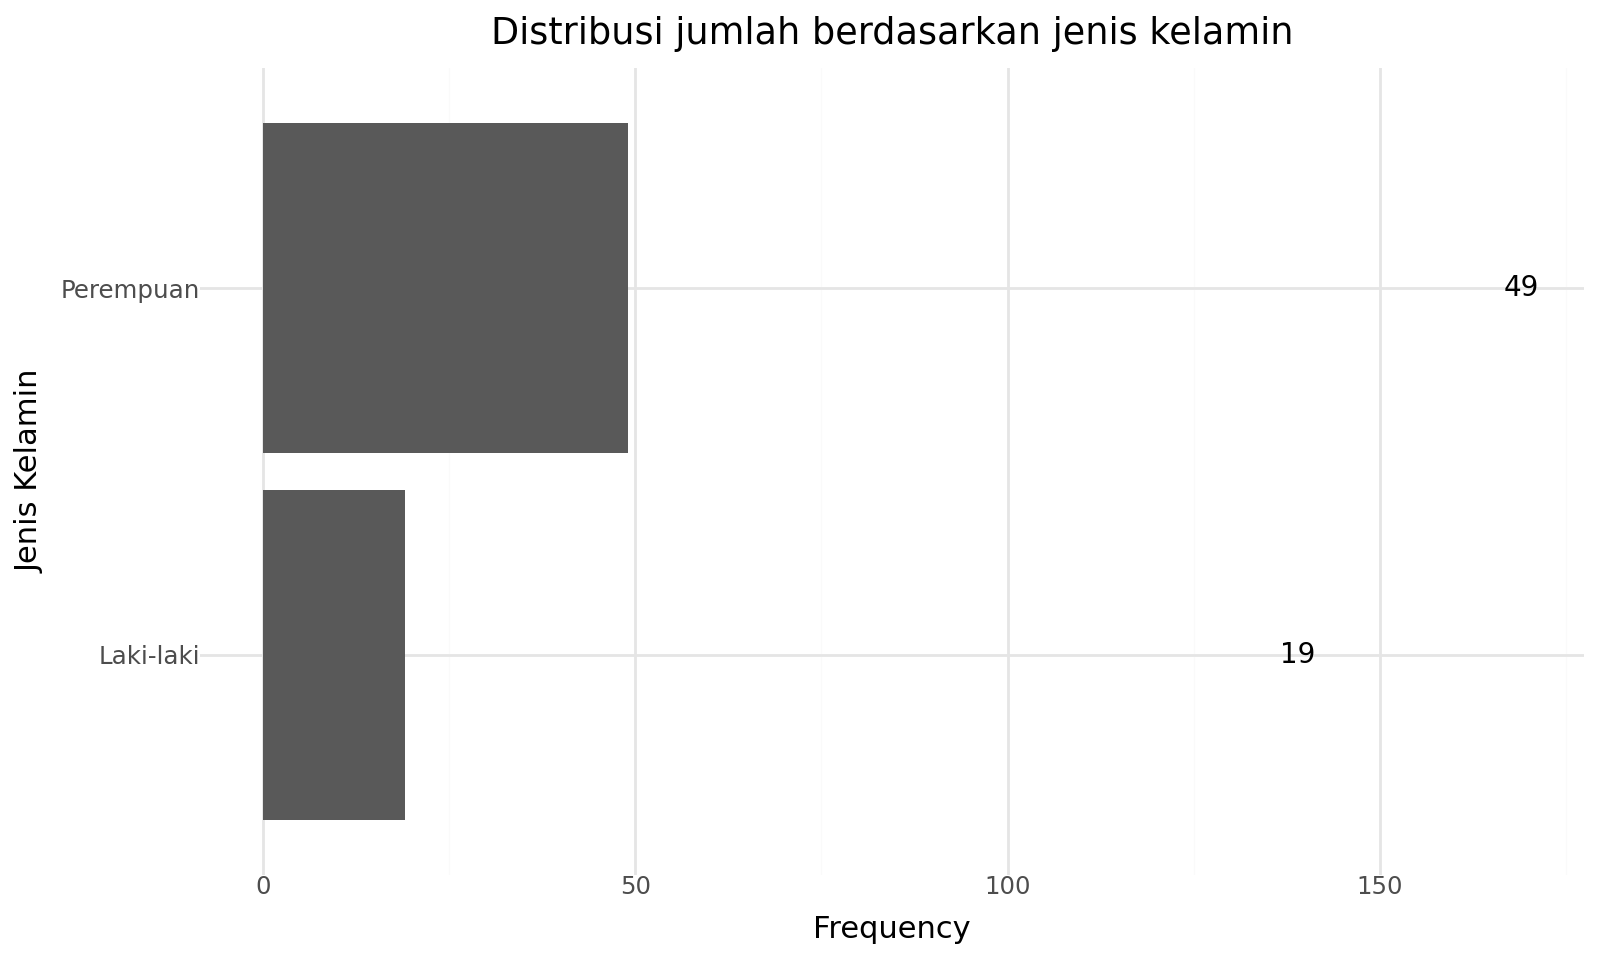

In [9]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_jeniskelamin)+
    geom_bar(aes(x = 'Jenis Kelamin',
                 y = 'Total'),
             stat = 'identity')+
    geom_text(aes(x = 'Jenis Kelamin',
                   y = 'Total',
                   label = 'Total'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi jumlah berdasarkan jenis kelamin')+
    xlab('Jenis Kelamin')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_jeniskelamin['Jenis Kelamin'].tolist())+
    theme_minimal()+
    coord_flip()
)

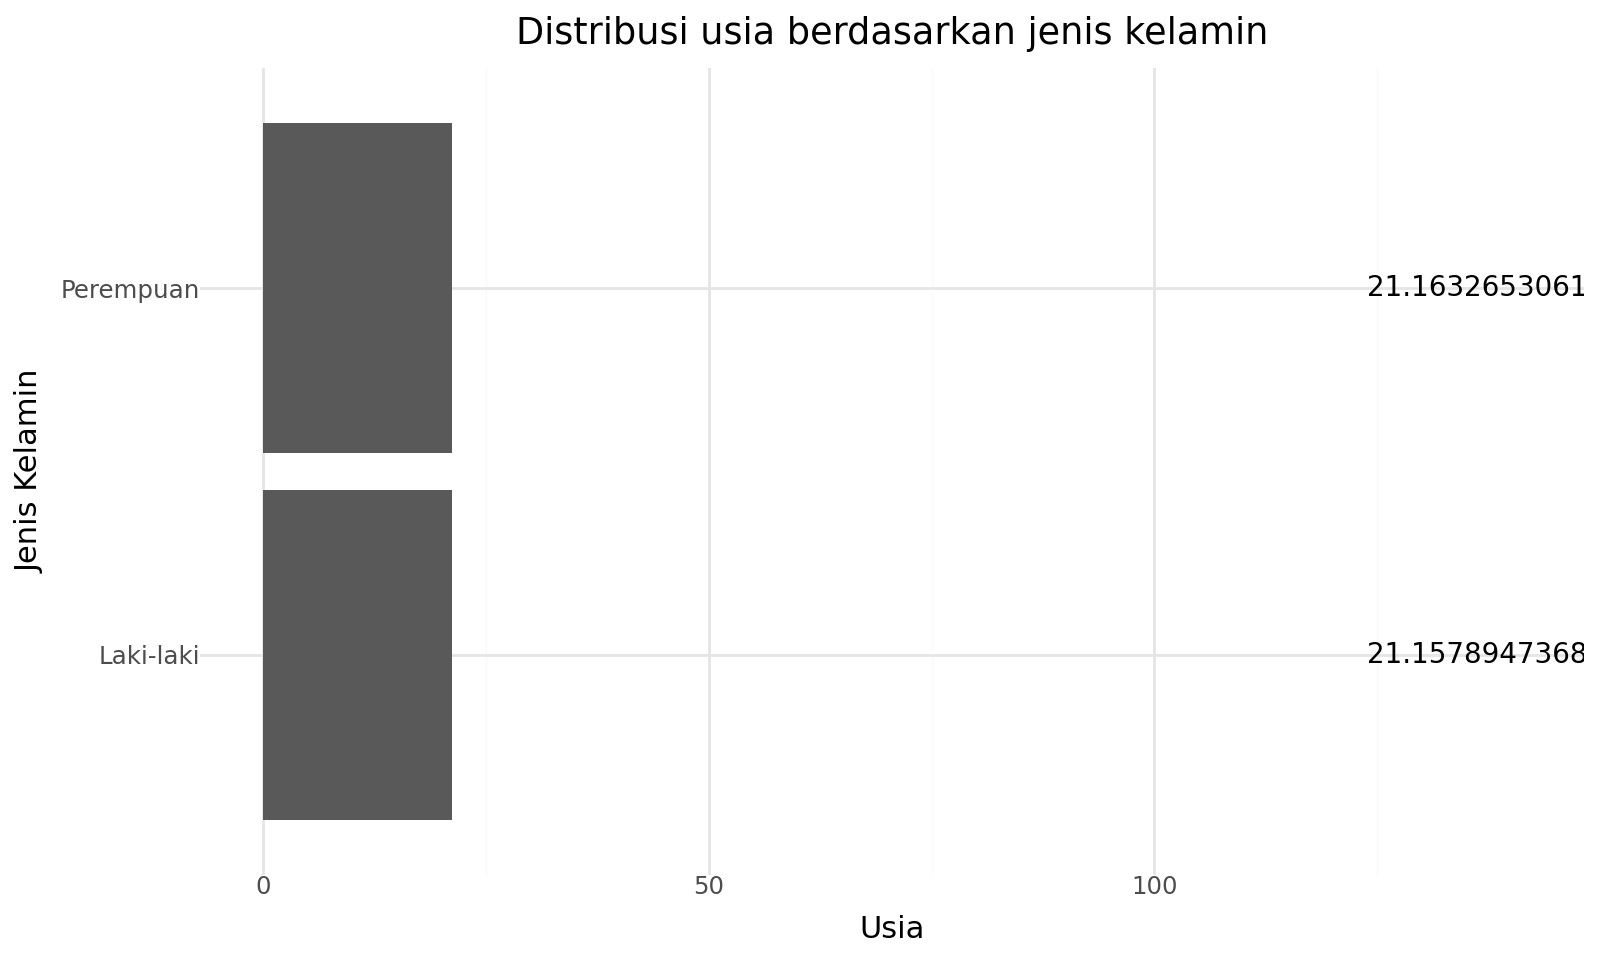

In [10]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_jeniskelamin)+
    geom_bar(aes(x = 'Jenis Kelamin',
                 y = 'Usia'),
             stat = 'identity')+
    geom_text(aes(x = 'Jenis Kelamin',
                   y = 'Usia',
                   label = 'Usia'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi usia berdasarkan jenis kelamin')+
    xlab('Jenis Kelamin')+
    ylab('Usia')+
    scale_x_discrete(limits = df_jeniskelamin['Jenis Kelamin'].tolist())+
    theme_minimal()+
    coord_flip()
)

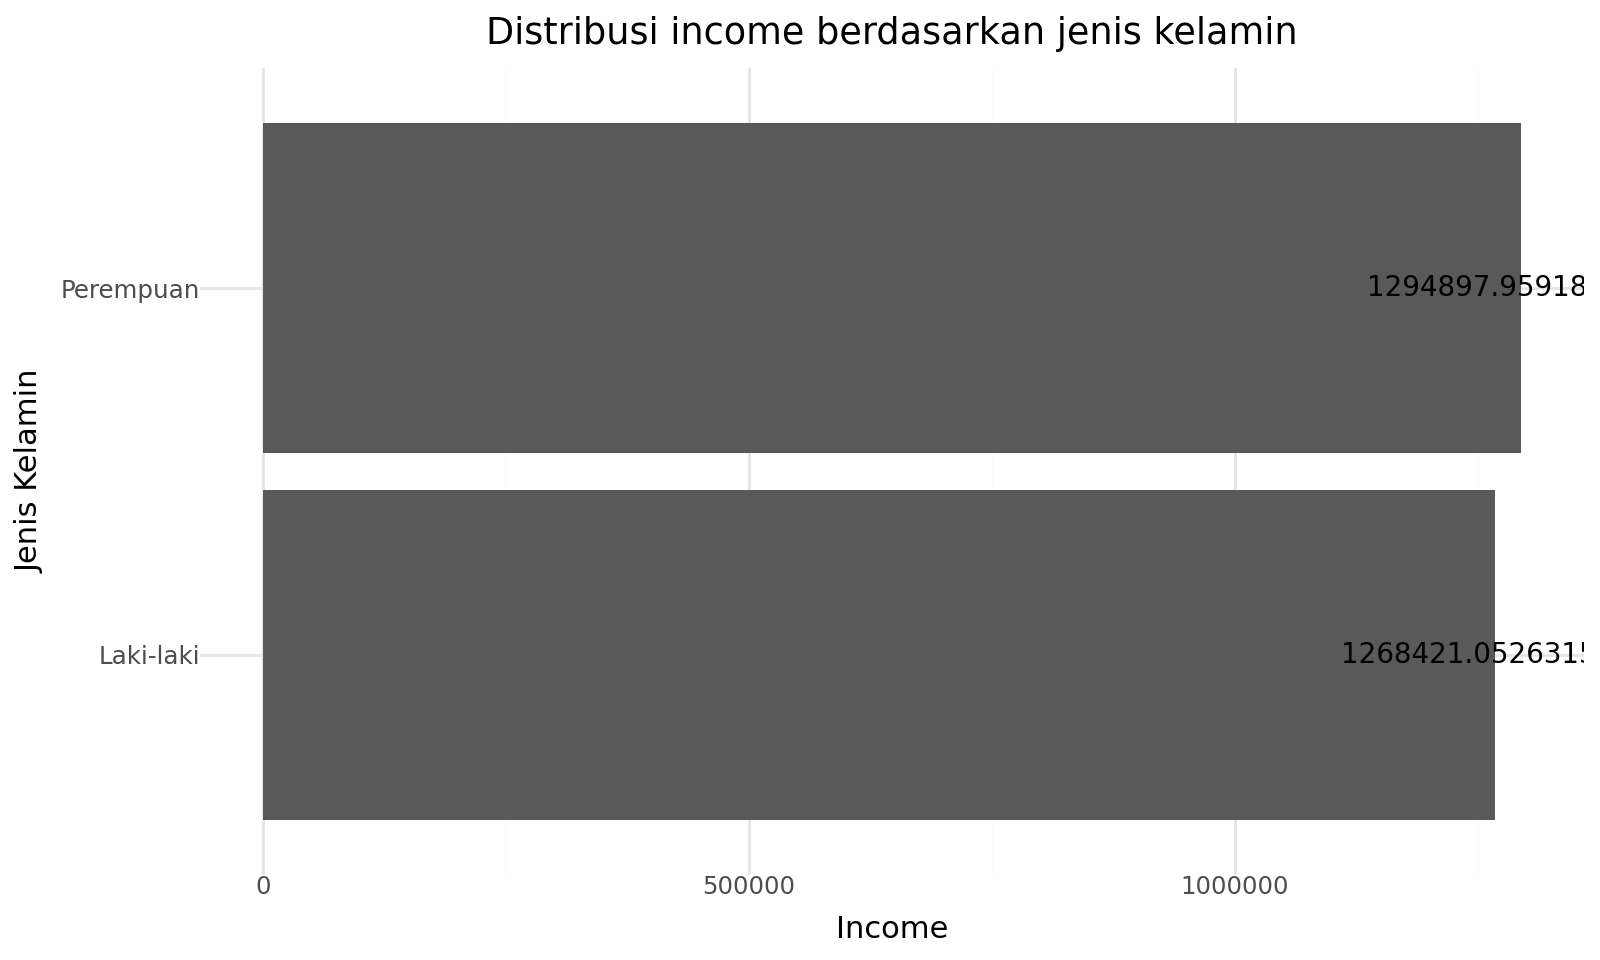

In [11]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_jeniskelamin)+
    geom_bar(aes(x = 'Jenis Kelamin',
                 y = 'Income'),
             stat = 'identity')+
    geom_text(aes(x = 'Jenis Kelamin',
                   y = 'Income',
                   label = 'Income'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi income berdasarkan jenis kelamin')+
    xlab('Jenis Kelamin')+
    ylab('Income')+
    scale_x_discrete(limits = df_jeniskelamin['Jenis Kelamin'].tolist())+
    theme_minimal()+
    coord_flip()
)

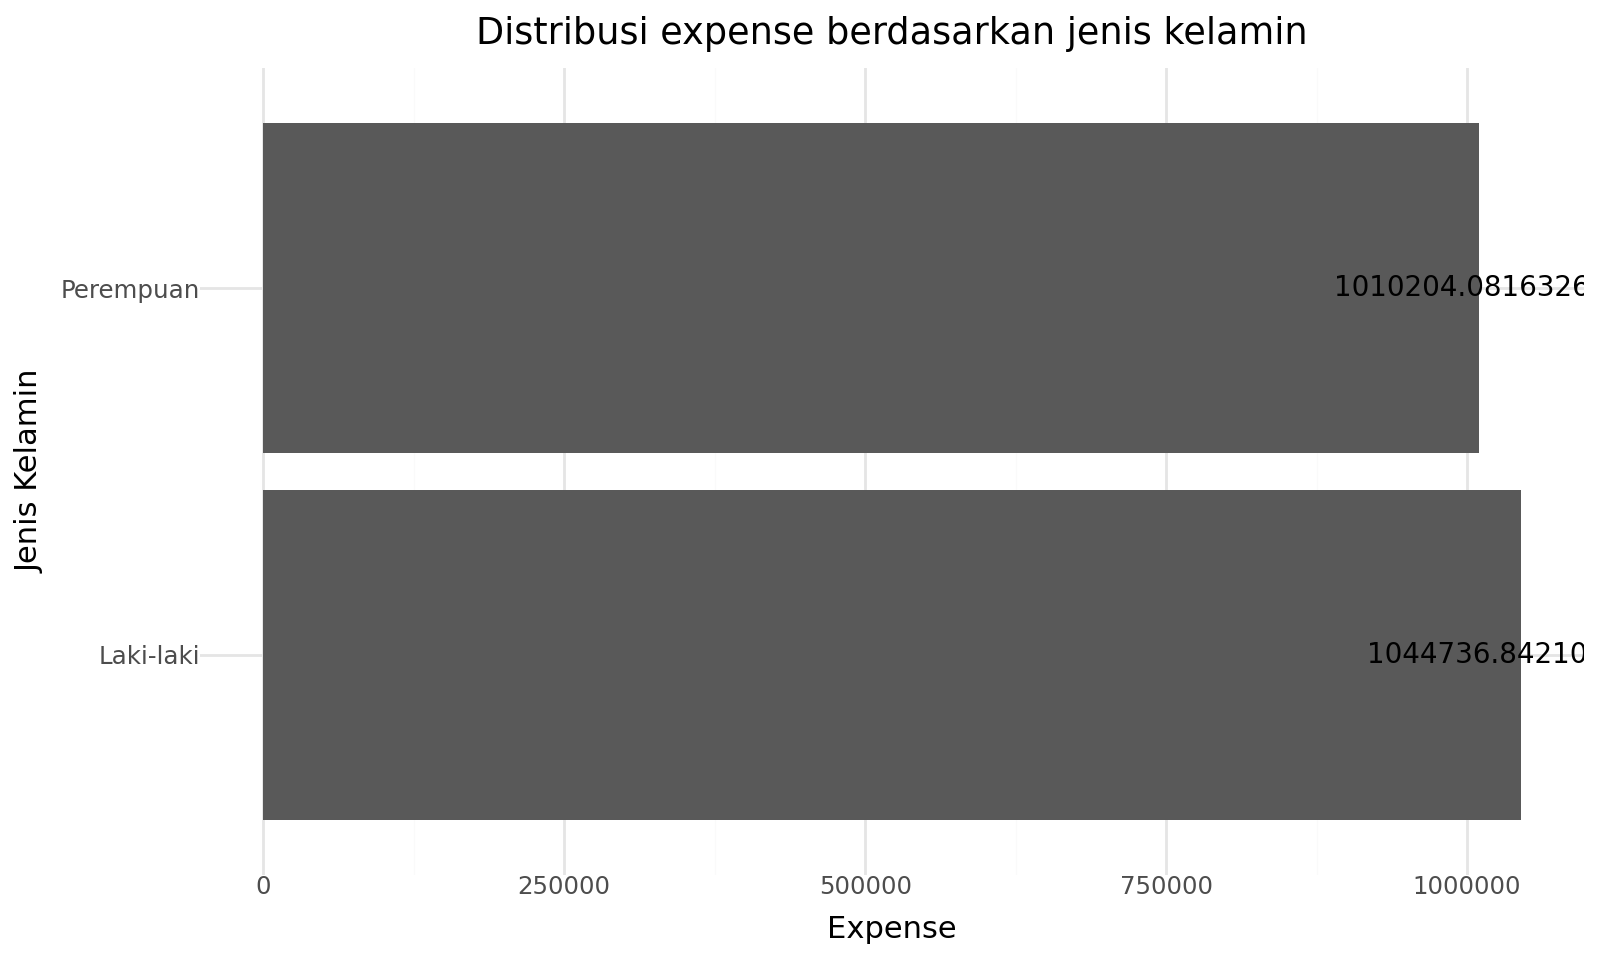

In [12]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_jeniskelamin)+
    geom_bar(aes(x = 'Jenis Kelamin',
                 y = 'Expense'),
             stat = 'identity')+
    geom_text(aes(x = 'Jenis Kelamin',
                   y = 'Expense',
                   label = 'Expense'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi expense berdasarkan jenis kelamin')+
    xlab('Jenis Kelamin')+
    ylab('Expense')+
    scale_x_discrete(limits = df_jeniskelamin['Jenis Kelamin'].tolist())+
    theme_minimal()+
    coord_flip()
)

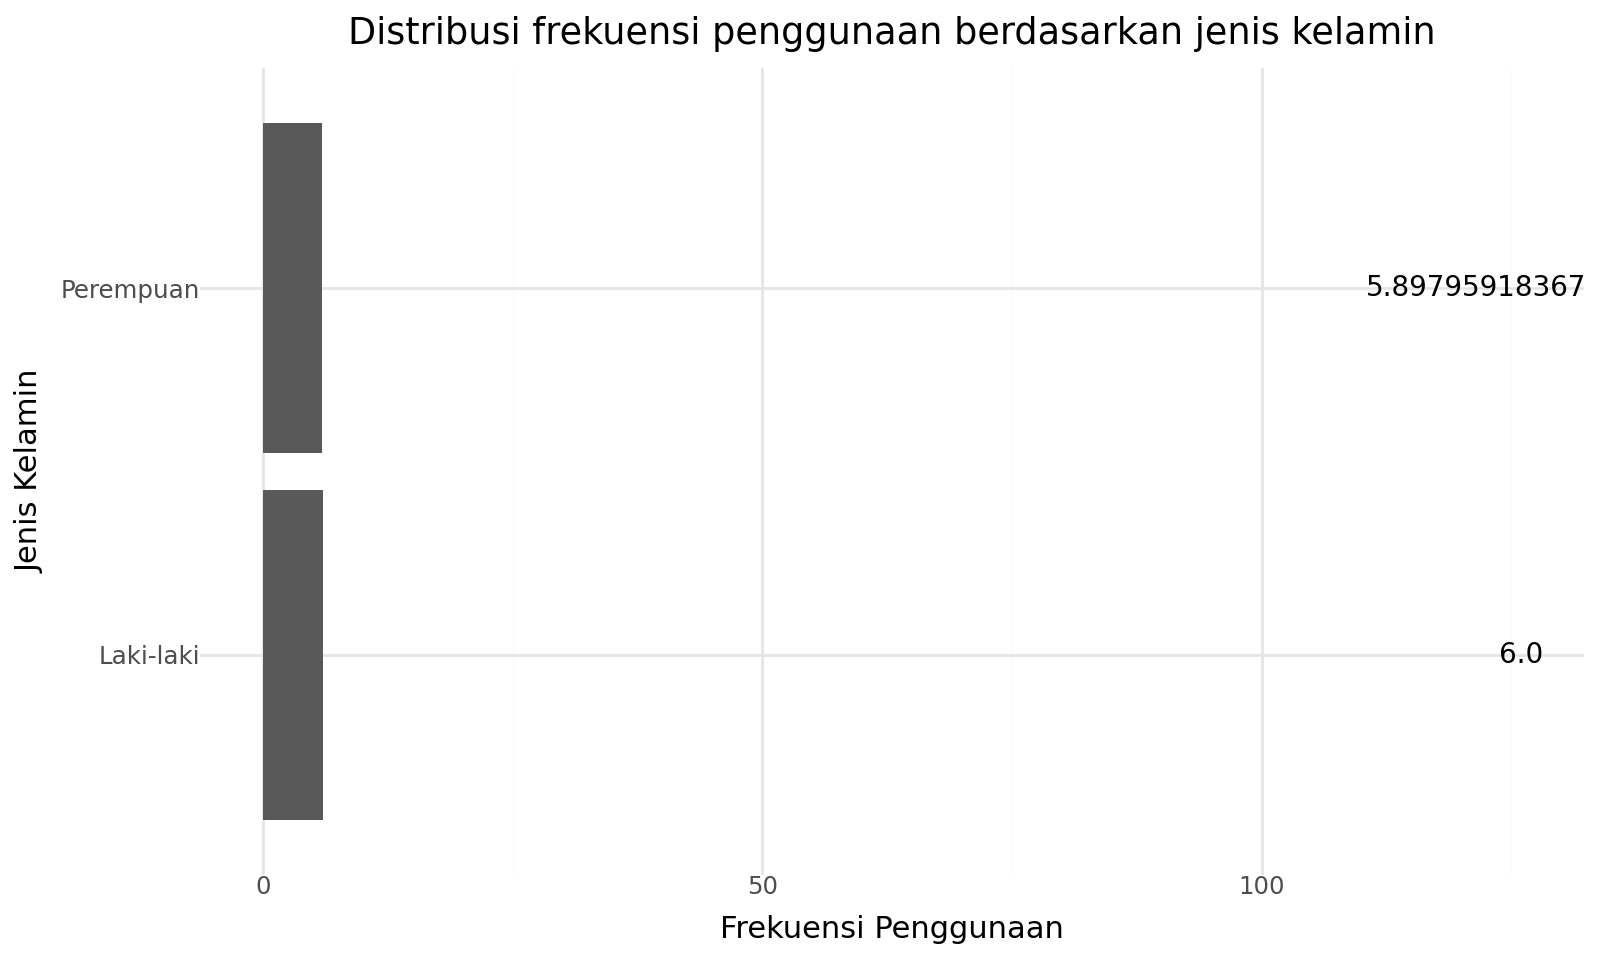

In [13]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_jeniskelamin)+
    geom_bar(aes(x = 'Jenis Kelamin',
                 y = 'Frekuensi Penggunaan'),
             stat = 'identity')+
    geom_text(aes(x = 'Jenis Kelamin',
                   y = 'Frekuensi Penggunaan',
                   label = 'Frekuensi Penggunaan'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi frekuensi penggunaan berdasarkan jenis kelamin')+
    xlab('Jenis Kelamin')+
    ylab('Frekuensi Penggunaan')+
    scale_x_discrete(limits = df_jeniskelamin['Jenis Kelamin'].tolist())+
    theme_minimal()+
    coord_flip()
)

#### Alasan Utama Penggunaan

In [14]:
df_ulasanutamapenggunaan = pd.DataFrame(df['Alasan Utama Penggunaan'].value_counts()).reset_index()
df_ulasanutamapenggunaan['Percentage'] = df_ulasanutamapenggunaan['count'] / df['Alasan Utama Penggunaan'].value_counts().sum()
df_ulasanutamapenggunaan.rename(columns = {'index':'Alasan Utama Penggunaan', 'Alasan Utama Penggunaan':'Total'}, inplace = True)
df_ulasanutamapenggunaan = df_ulasanutamapenggunaan.sort_values('Total', ascending = True).reset_index(drop = True)
df_ulasanutamapenggunaan

,Total,count,Percentage
0,Belanja,11,0.162
1,Promo/cashback,7,0.103
2,Tagihan,6,0.088
3,Transfer,43,0.632
4,Voucher Hiburan,1,0.015


In [15]:
df_ulasanutamapenggunaan = df.groupby('Alasan Utama Penggunaan').agg({
    'Alasan Utama Penggunaan': 'count',
    'Usia': 'mean',
    'Income': 'mean',
    'Expense': 'mean',
    'Frekuensi Penggunaan': 'mean'
    }
).rename(columns = {'Alasan Utama Penggunaan': 'Total'}).reset_index().sort_values('Total', ascending = True)

In [16]:
df_ulasanutamapenggunaan

,Alasan Utama Penggunaan,Total,Usia,Income,Expense,Frekuensi Penggunaan
4,Voucher Hiburan,1,22.000,1000000.000,1000000.000,1.000
2,Tagihan,6,21.333,1675000.000,1141666.667,2.500
1,Promo/cashback,7,21.286,1214285.714,964285.714,3.857
0,Belanja,11,21.091,1563636.364,1186363.636,8.364
3,Transfer,43,21.116,1181395.349,969767.442,6.233


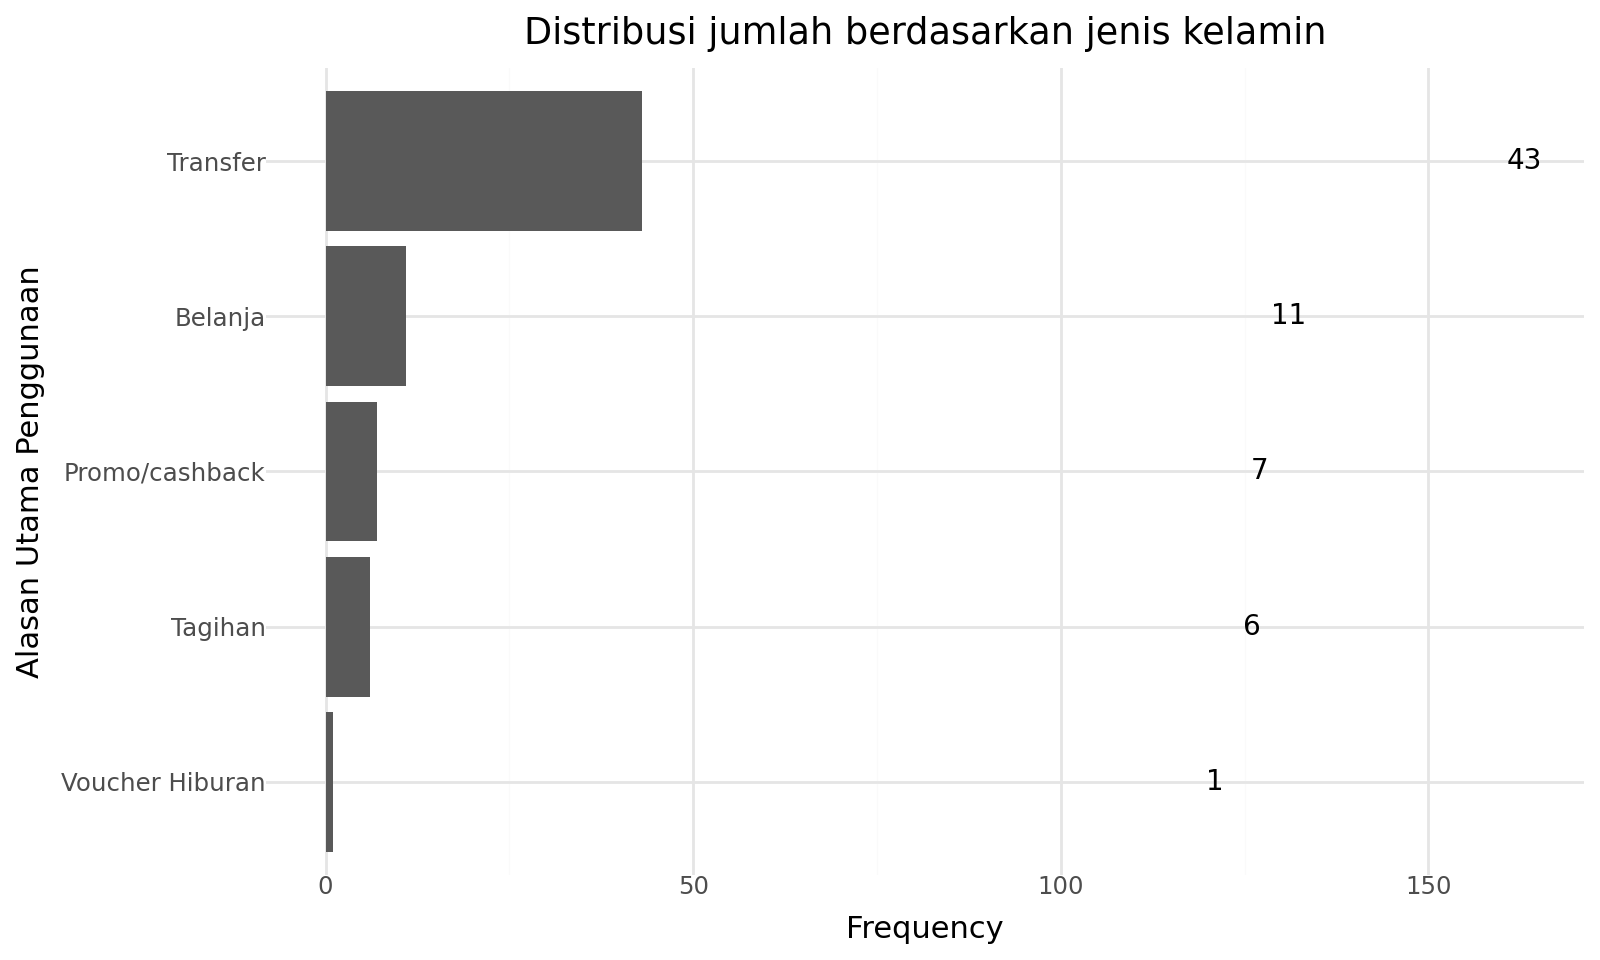

In [17]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_ulasanutamapenggunaan)+
    geom_bar(aes(x = 'Alasan Utama Penggunaan',
                 y = 'Total'),
             stat = 'identity')+
    geom_text(aes(x = 'Alasan Utama Penggunaan',
                   y = 'Total',
                   label = 'Total'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi jumlah berdasarkan jenis kelamin')+
    xlab('Alasan Utama Penggunaan')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_ulasanutamapenggunaan['Alasan Utama Penggunaan'].tolist())+
    theme_minimal()+
    coord_flip()
)

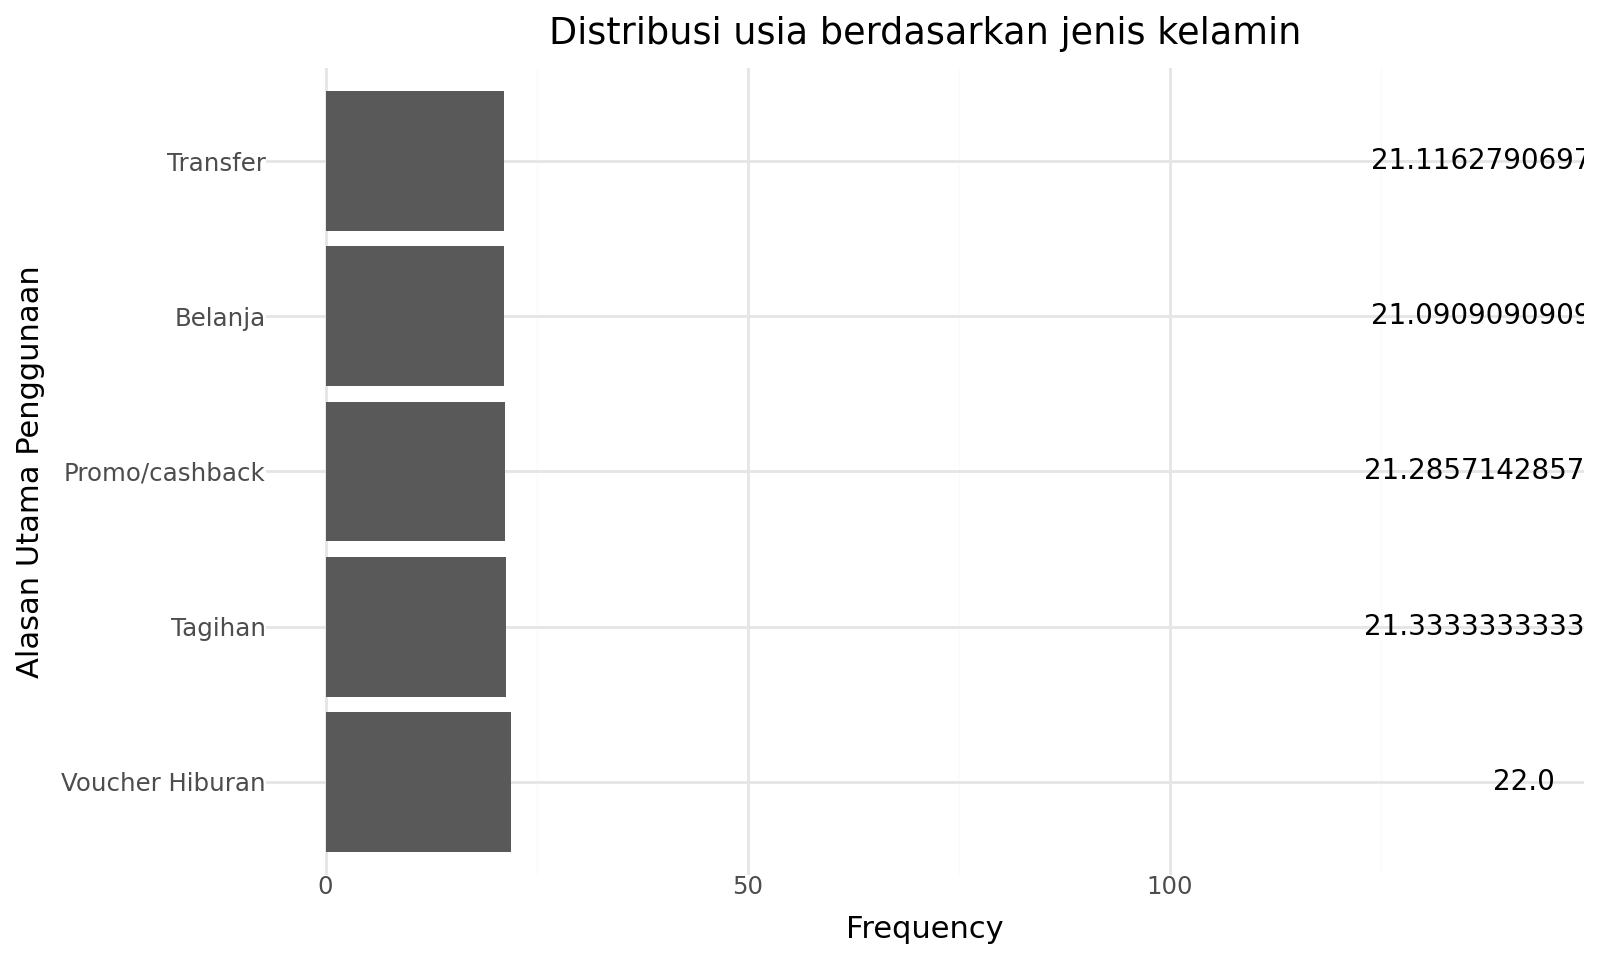

In [18]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_ulasanutamapenggunaan)+
    geom_bar(aes(x = 'Alasan Utama Penggunaan',
                 y = 'Usia'),
             stat = 'identity')+
    geom_text(aes(x = 'Alasan Utama Penggunaan',
                   y = 'Usia',
                   label = 'Usia'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi usia berdasarkan jenis kelamin')+
    xlab('Alasan Utama Penggunaan')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_ulasanutamapenggunaan['Alasan Utama Penggunaan'].tolist())+
    theme_minimal()+
    coord_flip()
)

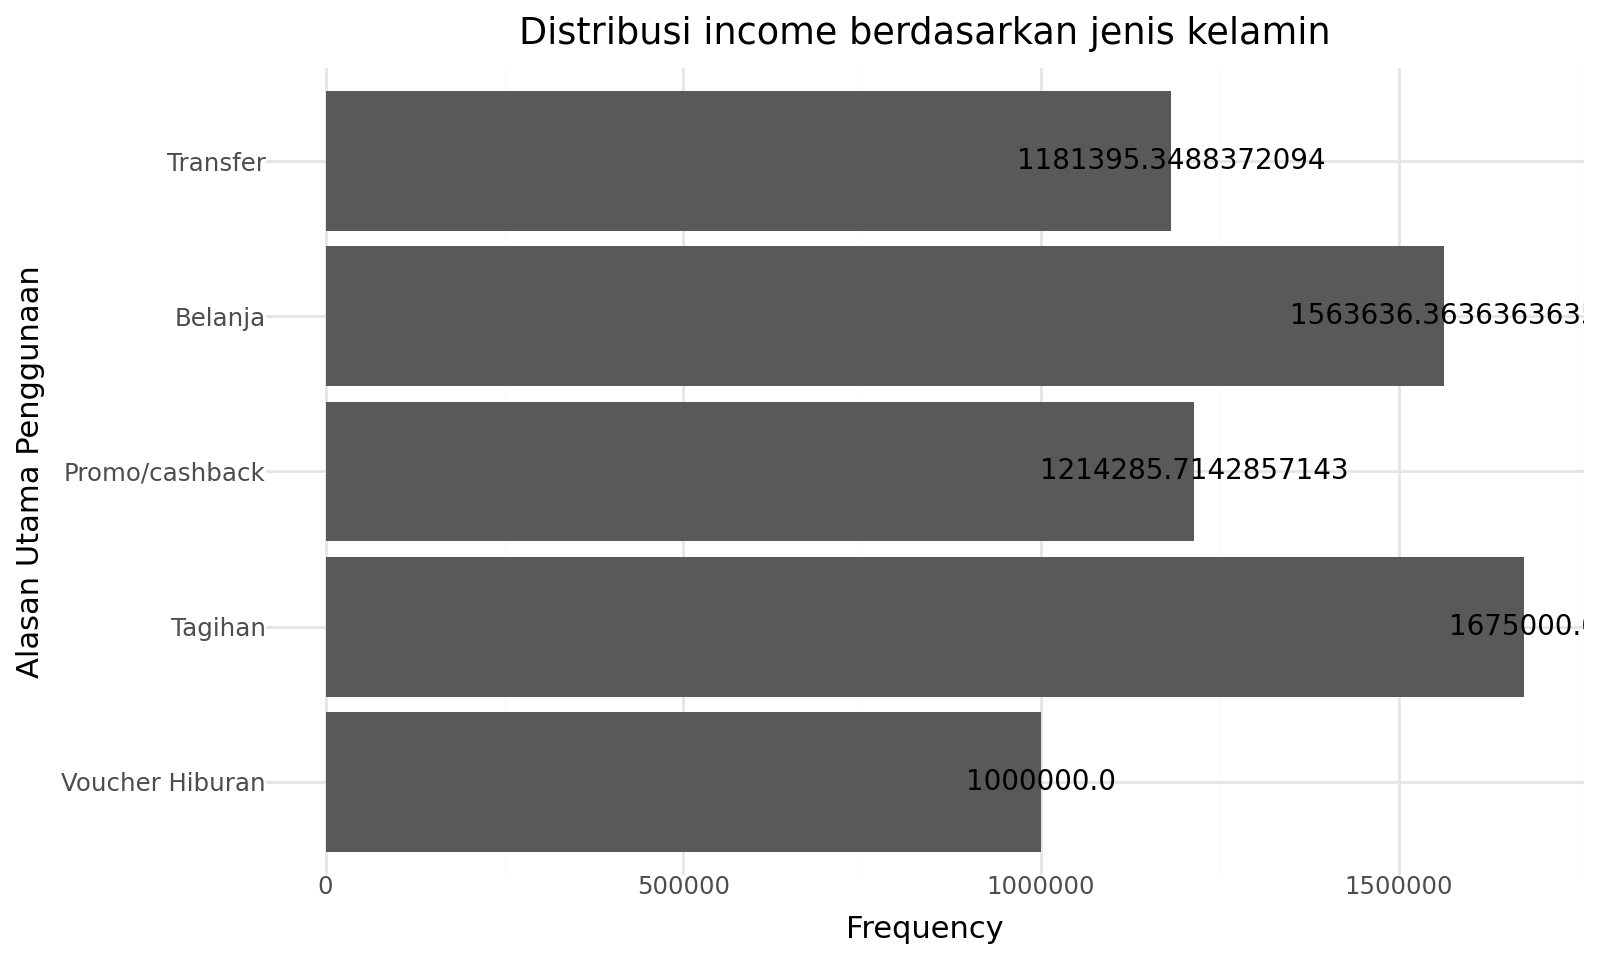

In [19]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_ulasanutamapenggunaan)+
    geom_bar(aes(x = 'Alasan Utama Penggunaan',
                 y = 'Income'),
             stat = 'identity')+
    geom_text(aes(x = 'Alasan Utama Penggunaan',
                   y = 'Income',
                   label = 'Income'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi income berdasarkan jenis kelamin')+
    xlab('Alasan Utama Penggunaan')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_ulasanutamapenggunaan['Alasan Utama Penggunaan'].tolist())+
    theme_minimal()+
    coord_flip()
)

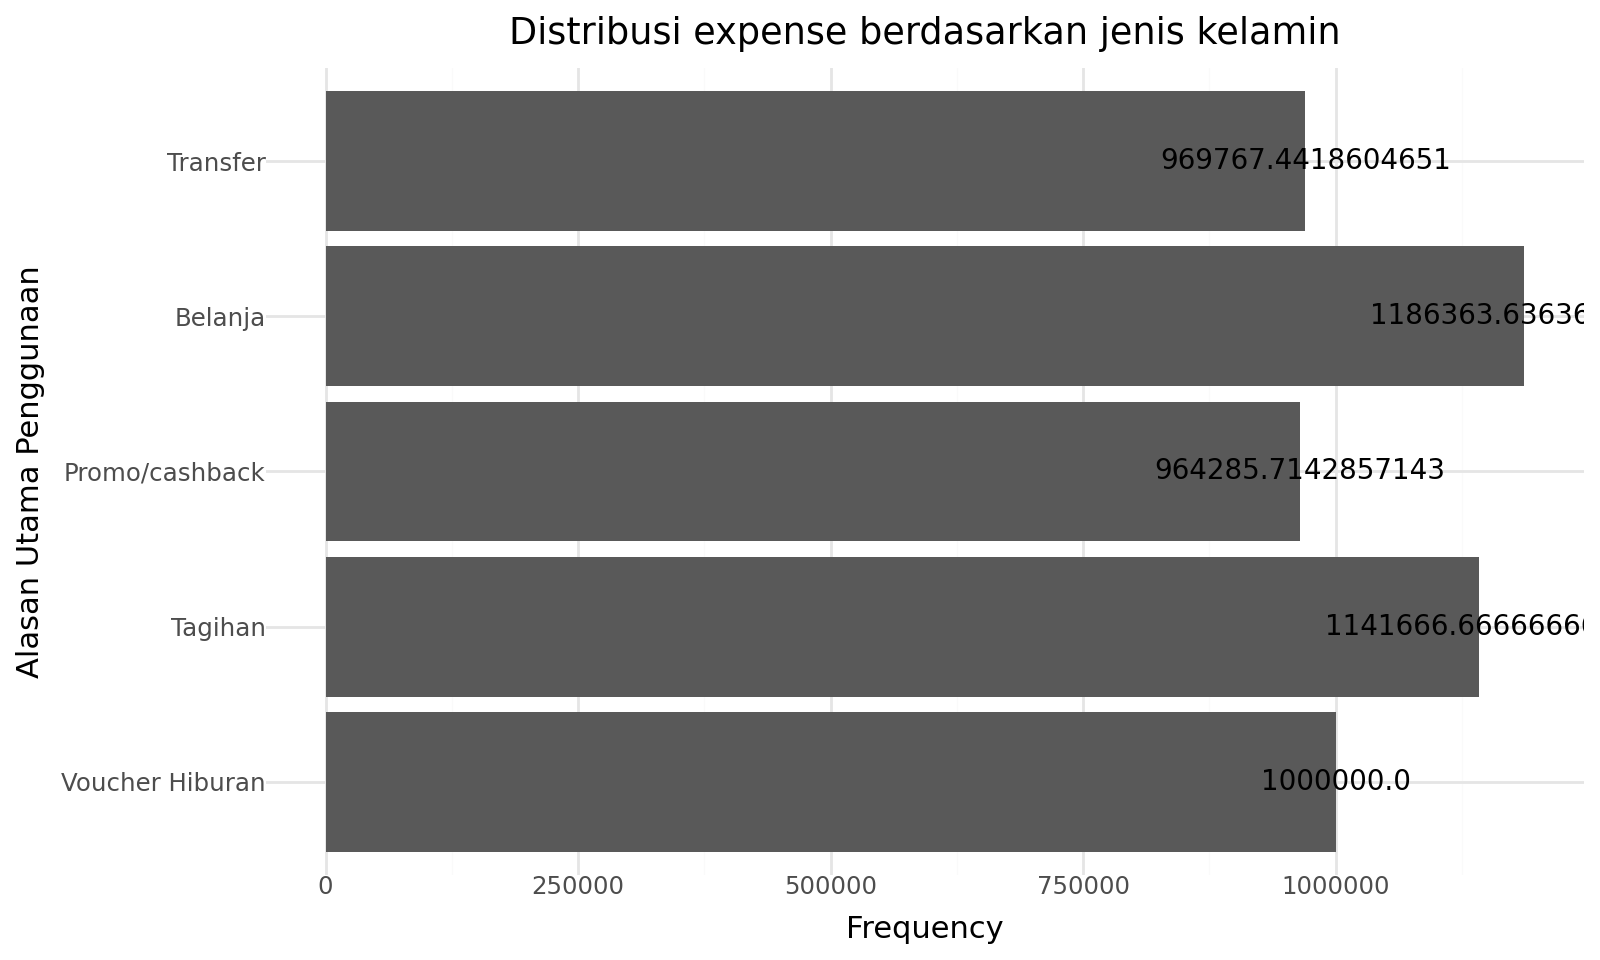

In [20]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_ulasanutamapenggunaan)+
    geom_bar(aes(x = 'Alasan Utama Penggunaan',
                 y = 'Expense'),
             stat = 'identity')+
    geom_text(aes(x = 'Alasan Utama Penggunaan',
                   y = 'Expense',
                   label = 'Expense'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi expense berdasarkan jenis kelamin')+
    xlab('Alasan Utama Penggunaan')+
    ylab('Frequency')+
    scale_x_discrete(limits = df_ulasanutamapenggunaan['Alasan Utama Penggunaan'].tolist())+
    theme_minimal()+
    coord_flip()
)

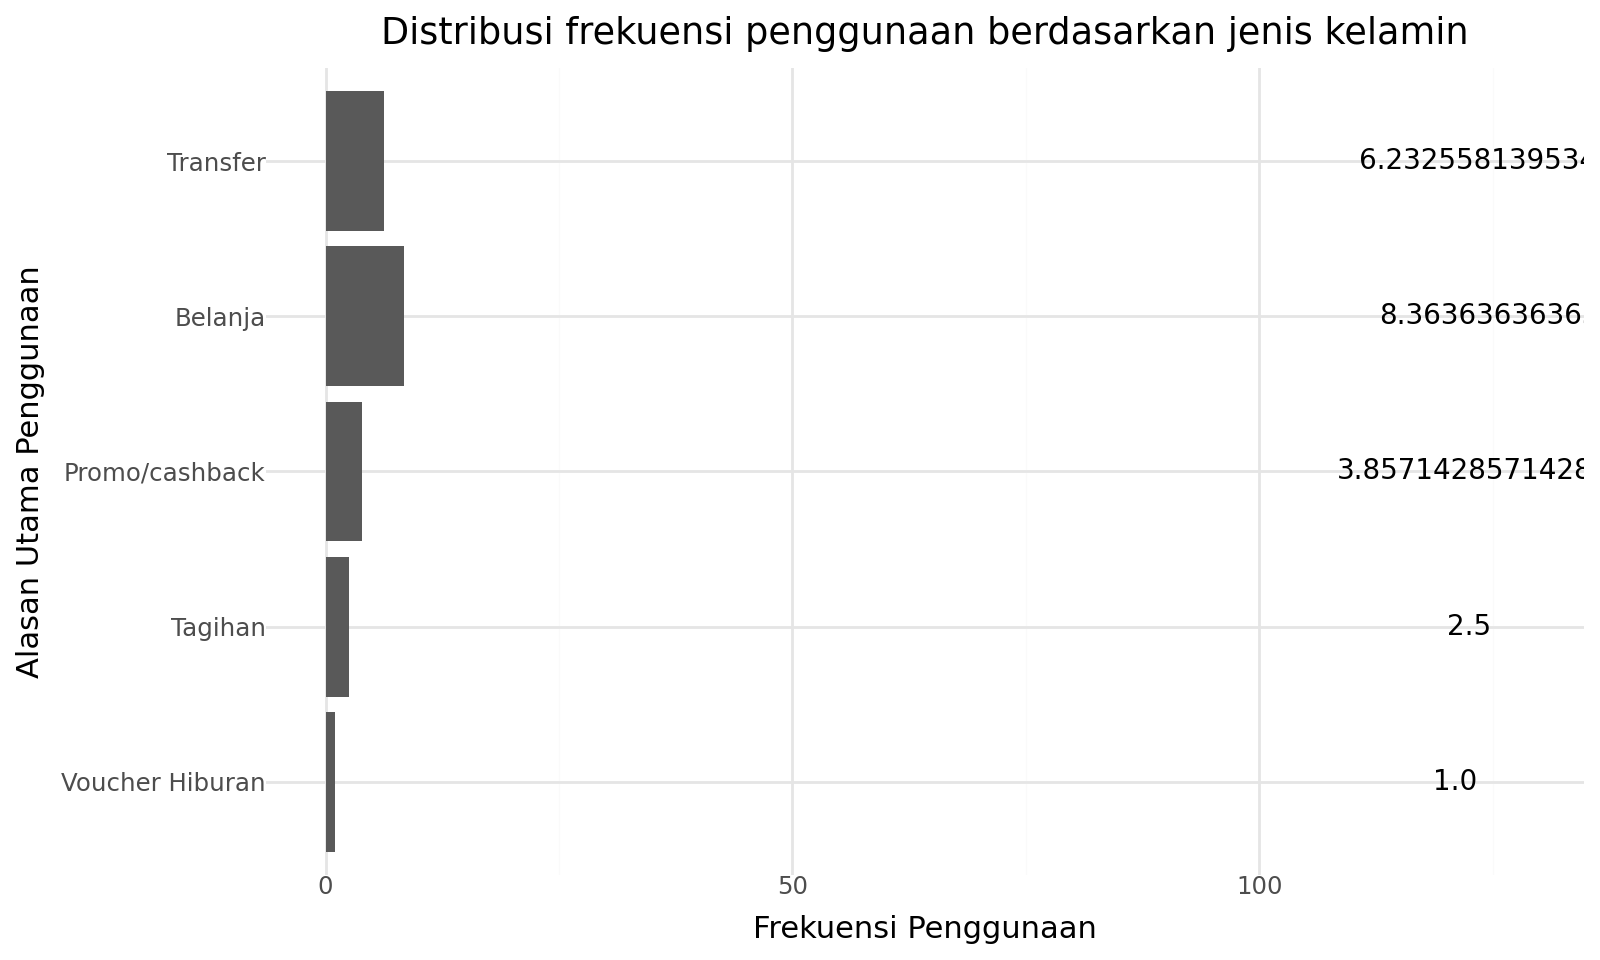

In [21]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_ulasanutamapenggunaan)+
    geom_bar(aes(x = 'Alasan Utama Penggunaan',
                 y = 'Frekuensi Penggunaan'),
             stat = 'identity')+
    geom_text(aes(x = 'Alasan Utama Penggunaan',
                   y = 'Frekuensi Penggunaan',
                   label = 'Frekuensi Penggunaan'),
               size = 10,
               nudge_y = 120)+
    labs(title = 'Distribusi frekuensi penggunaan berdasarkan jenis kelamin')+
    xlab('Alasan Utama Penggunaan')+
    ylab('Frekuensi Penggunaan')+
    scale_x_discrete(limits = df_ulasanutamapenggunaan['Alasan Utama Penggunaan'].tolist())+
    theme_minimal()+
    coord_flip()
)

### Clustering

#### Preparation

In [22]:
df.drop(['Inisial', 'NIM'], axis = 1, inplace = True)

In [23]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 68 rows and 6 columns


,Usia,Jenis Kelamin,Income,Expense,Alasan Utama Penggunaan,Frekuensi Penggunaan
0,21,Perempuan,1000000,500000,Transfer,4
1,22,Laki-laki,1500000,1500000,Belanja,3
2,21,Perempuan,700000,500000,Promo/cashback,2
3,22,Perempuan,800000,750000,Promo/cashback,8
4,21,Perempuan,2400000,1500000,Transfer,3


In [24]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Jenis Kelamin', 'Alasan Utama Penggunaan']
Categorical columns position  : [1, 4]


In [25]:
dfMatrix = df.to_numpy()

In [26]:
dfMatrix

array([[21, 'Perempuan', 1000000, 500000, 'Transfer', 4],
       [22, 'Laki-laki', 1500000, 1500000, 'Belanja', 3],
       [21, 'Perempuan', 700000, 500000, 'Promo/cashback', 2],
       [22, 'Perempuan', 800000, 750000, 'Promo/cashback', 8],
       [21, 'Perempuan', 2400000, 1500000, 'Transfer', 3],
       [22, 'Perempuan', 1000000, 1000000, 'Voucher Hiburan', 1],
       [22, 'Perempuan', 1800000, 1600000, 'Transfer', 2],
       [20, 'Perempuan', 1000000, 800000, 'Transfer', 1],
       [21, 'Laki-laki', 2000000, 1050000, 'Belanja', 15],
       [21, 'Perempuan', 1200000, 1000000, 'Belanja', 0],
       [22, 'Perempuan', 1000000, 800000, 'Transfer', 0],
       [22, 'Perempuan', 1500000, 1500000, 'Transfer', 3],
       [22, 'Perempuan', 1500000, 1500000, 'Belanja', 15],
       [21, 'Perempuan', 2000000, 2000000, 'Transfer', 14],
       [20, 'Laki-laki', 1000000, 1000000, 'Transfer', 4],
       [21, 'Perempuan', 1000000, 900000, 'Belanja', 2],
       [21, 'Laki-laki', 4000000, 2800000, 'Bel

#### K Optimal

In [27]:
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8


In [28]:
df_cost = pd.DataFrame({'Cluster':range(1, 9), 'Cost':cost})
df_cost.head()

,Cluster,Cost
0,1,57812580609116.758
1,2,23039107870053.270
2,3,9928179427784.582
3,4,7063058269939.737
4,5,5162745175210.395


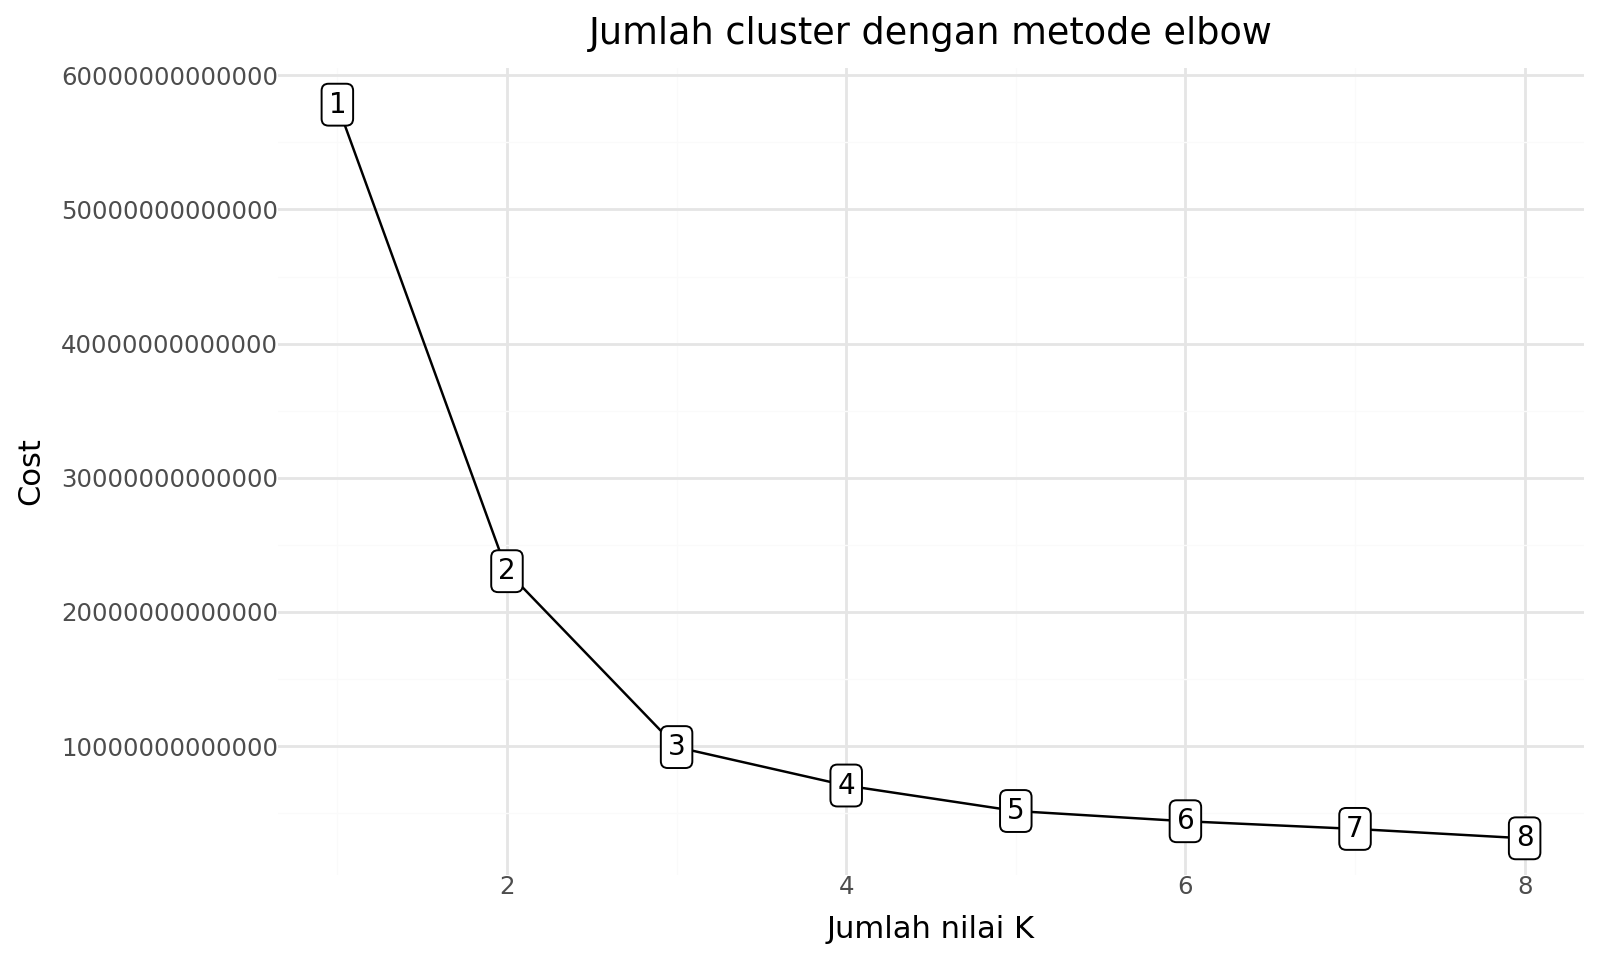

In [29]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Jumlah cluster dengan metode elbow')+
    xlab('Jumlah nilai K')+
    ylab('Cost')+
    theme_minimal()
)

#### Fit Cluster

In [30]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 2], dtype=uint16)

In [31]:
kprototype.cluster_centroids_

array([['21.0', '3166666.6666666665', '2133333.3333333335', '5.5',
        'Perempuan', 'Tagihan'],
       ['21.2', '813750.0', '665000.0', '4.075', 'Perempuan', 'Transfer'],
       ['21.136363636363637', '1636363.6363636365', '1361363.6363636365',
        '9.409090909090908', 'Perempuan', 'Transfer']], dtype='<U32')

In [32]:
kprototype.n_iter_

2

In [33]:
kprototype.cost_

9928179427784.582

In [34]:
df['cluster_id'] = kprototype.labels_

In [35]:
df.head()

,Usia,Jenis Kelamin,Income,Expense,Alasan Utama Penggunaan,Frekuensi Penggunaan,cluster_id
0,21,Perempuan,1000000,500000,Transfer,4,1
1,22,Laki-laki,1500000,1500000,Belanja,3,2
2,21,Perempuan,700000,500000,Promo/cashback,2,1
3,22,Perempuan,800000,750000,Promo/cashback,8,1
4,21,Perempuan,2400000,1500000,Transfer,3,2
